# Test: Daily Load of Records from Excel Sheet into Feature Layer, adding Geometry

# Workflow Description

1. Open excel file to a designated sheet

2. Determine today's date, and retrieve records from today's date into a spatial dataframe

3. For each record, retrieve the zip code, and get geometry from a reference shapefile or publicly available zip code layer

4. Use the spatial dataframe of new records with geometry in an update (add) operation on a specified target layer

Import needed modules

In [1]:
import arcgis
import pandas as pd
from datetime import datetime

Set paths to needed data and directories

In [2]:
# excel_path = ""
# sheet_name = ""
# reference_geometry_shapefile = ""
# reference_geometry_service = ""
# target_layer_agol_org_url = ""
# target_layer_name = ""

In [3]:
excel_path = r"D:\3_Sandbox_Projects\1807_ExcelToPython_CongressionalStaff\Book1.xlsx"
sheet_name = "Master"
excel_date_field_name = "Date"
excel_zip_field_name = "ZIP"
excel_issue_field_name = "Issue"
excel_count_field_name = "Count"

In [4]:
reference_geometry_shapefile = r"D:\3_Sandbox_Projects\1807_ExcelToPython_CongressionalStaff\ZipRef\zip_poly.shp"
# reference_geometry_service = "USA ZIP Codes (2016)"

In [5]:
target_layer_agol_org_url = "https://esrifederal.maps.arcgis.com"
target_layer_agol_org_username = "Anieto_esrifederal"
target_layer_name = "PythonDataTest02"

Authenticate with the GIS that the target layer resides in

In [6]:
gis = arcgis.gis.GIS(target_layer_agol_org_url, target_layer_agol_org_username)

Enter password: ········


Instantiate connection to the target layer

<Item title:"PythonDataTest02" type:Feature Layer Collection owner:Anieto_esrifederal>
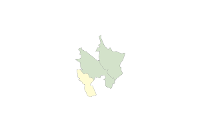

In [7]:
target_item = gis.content.search(target_layer_name, "feature service")[0]; target_item

# 1. Open excel file to a designated sheet

In [21]:
input_df = pd.read_excel(excel_path, sheetname=sheet_name); input_df

,ZIP,Date,Issue,Count
0,22102,2018-07-23,a,3
1,22102,2018-07-23,b,3
2,22102,2018-07-23,c,3
3,22181,2018-07-23,c,1
4,22182,2018-07-23,a,3
5,22182,2018-07-23,b,3
6,22182,2018-07-23,c,3
7,22102,2018-07-24,a,2
8,22102,2018-07-24,b,2
9,22102,2018-07-24,c,2


# 2. Determine today's date, and retrieve records from today's date into a spatial dataframe

In [22]:
today_string = datetime.today().strftime('%m/%d/%Y')
today_string

'07/26/2018'

In [23]:
today_df = input_df.loc[input_df['Date'] == today_string]; today_df

,ZIP,Date,Issue,Count
22,22102,2018-07-26,a,1
23,22102,2018-07-26,c,1
24,22182,2018-07-26,b,2
25,22182,2018-07-26,c,3


Cast the zips from the input to string

In [26]:
today_df[excel_zip_field_name] = today_df[excel_zip_field_name].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 3. For each record, retrieve the zip code, and get geometry from a reference shapefile or publicly available zip code layer

Bring our reference shapefile of zip codes with geometry into a spatial dataframe

In [24]:
sp_df = arcgis.features.SpatialDataFrame.from_featureclass(reference_geometry_shapefile); sp_df

,index,POPULATION,POP_SQMI,PO_NAME,SHAPE,SQMI,STATE,Shape_Area,Shape_Leng,ZIP_CODE
0,0,-99,-99.00,Leeward Islands,"{'rings': [[((-161.92806300010733, 23.05706800...",3.10,HI,0.000724,0.460828,00013
1,1,850,4.01,Naalehu,"{'rings': (((-155.6689159999734, 18.9168399996...",211.73,HI,0.047072,1.074963,96772
2,2,4115,9.86,Captain Cook,"{'rings': [[((-155.78037999963723, 18.99438900...",417.52,HI,0.092937,2.050998,96704
3,3,30,0.13,Holualoa,"{'rings': (((-155.7491979996879, 19.4076450000...",238.02,HI,0.053070,1.384644,96725
4,4,-99,-99.00,Honaunau,"{'rings': (((-155.90402799999217, 19.409407000...",0.33,HI,0.000074,0.050627,96726
5,5,78,7.66,Kealakekua,"{'rings': (((-155.93209900036854, 19.486057999...",10.18,HI,0.002269,0.247395,96750
6,6,209,0.79,Hawaii National Park,"{'rings': [[((-155.3971727999847, 19.190307899...",263.16,HI,0.058612,2.090392,96718
7,7,1255,3.52,Pahala,"{'rings': (((-155.4998279995625, 19.1347369999...",357.01,HI,0.079478,1.508578,96777
8,8,52229,210.52,Kailua Kona,"{'rings': (((-155.95501500044188, 19.528739999...",248.09,HI,0.055376,1.676511,96740
9,9,3474,122.19,Waikoloa,"{'rings': (((-155.79850099982124, 19.896646999...",28.43,HI,0.006354,0.500318,96738


Retrieve today's zip codes into a list of strings to allow us to query the reference zip code spatial dataframe

In [13]:
today_zips_list = today_df[excel_zip_field_name].tolist(); today_zips_list
# today_zips_list = [str(item) for item in today_zips_list]; today_zips_list

['22102', '22102', '22182', '22182']

Create a new query of zips with geometry from today's zips

In [14]:
today_sp_df =  sp_df[sp_df.ZIP_CODE.isin(today_zips_list)]; today_sp_df

,index,POPULATION,POP_SQMI,PO_NAME,SHAPE,SQMI,STATE,Shape_Area,Shape_Leng,ZIP_CODE
24180,24180,23929,1980.88,Mc Lean,"{'rings': (((-77.21567529957537, 38.9094707997...",12.08,VA,0.003251,0.412163,22102
24182,24182,24686,2055.45,Vienna,"{'rings': (((-77.23779400029287, 38.8937249999...",12.01,VA,0.003231,0.399450,22182


Format the columns and join the today_df

In [15]:
target_sp_df = pd.merge(left=today_df, right=today_sp_df, left_on=excel_zip_field_name, right_on="ZIP_CODE"); target_sp_df

,ZIP,Date,Issue,Count,index,POPULATION,POP_SQMI,PO_NAME,SHAPE,SQMI,STATE,Shape_Area,Shape_Leng,ZIP_CODE
0,22102,2018-07-26,a,1,24180,23929,1980.88,Mc Lean,"{'rings': (((-77.21567529957537, 38.9094707997...",12.08,VA,0.003251,0.412163,22102
1,22102,2018-07-26,c,1,24180,23929,1980.88,Mc Lean,"{'rings': (((-77.21567529957537, 38.9094707997...",12.08,VA,0.003251,0.412163,22102
2,22182,2018-07-26,b,2,24182,24686,2055.45,Vienna,"{'rings': (((-77.23779400029287, 38.8937249999...",12.01,VA,0.003231,0.399450,22182
3,22182,2018-07-26,c,3,24182,24686,2055.45,Vienna,"{'rings': (((-77.23779400029287, 38.8937249999...",12.01,VA,0.003231,0.399450,22182


Create order of needed columns

In [16]:
columns = ['SHAPE', excel_zip_field_name, excel_date_field_name, excel_issue_field_name, excel_count_field_name]; columns

['SHAPE', 'ZIP', 'Date', 'Issue', 'Count']

In [17]:
target_sp_df = target_sp_df[columns]; target_sp_df

,SHAPE,ZIP,Date,Issue,Count
0,"{'rings': (((-77.21567529957537, 38.9094707997...",22102,2018-07-26,a,1
1,"{'rings': (((-77.21567529957537, 38.9094707997...",22102,2018-07-26,c,1
2,"{'rings': (((-77.23779400029287, 38.8937249999...",22182,2018-07-26,b,2
3,"{'rings': (((-77.23779400029287, 38.8937249999...",22182,2018-07-26,c,3


Set an attribute field name map since Maps for Office gives strange column names to the service behind the scenes

In [42]:
attribute_map = {'f1':'ZIP', 'f2':'Date', 'f3':'Issue', 'f4': 'Count'}

# Single Attribute Update Test

Bring a single record from the dataframe of zip code entries to add

In [30]:
test_record = target_sp_df.iloc[0]; test_record

SHAPE    {'rings': (((-77.21567529957537, 38.9094707997...
ZIP                                                  22102
Date                                   2018-07-26 00:00:00
Issue                                                    a
Count                                                    1
Name: 0, dtype: object

Create a template attribute dictionary

In [33]:
attribute_dict = {"f1": "99999", 
                  "f2": "01/01/1900", 
                  "f3": "None", 
                  "f4": "99"
                 }

Add data from the record to the template attribute dictionary

In [56]:
test_geometry = test_record['SHAPE']
test_attributes = attribute_dict
test_attributes['f1'] = test_record[attribute_map['f1']]
test_attributes['f2'] = test_record[attribute_map['f2']]
test_attributes['f3'] = test_record[attribute_map['f3']]
test_attributes['f4'] = test_record[attribute_map['f4']]
test_attributes

{'f1': '22102', 'f2': Timestamp('2018-07-26 00:00:00'), 'f3': 'a', 'f4': 1}

In [36]:
test_geometry

{"rings": [[[-77.21567529957537, 38.909470799737676], [-77.21571409992572, 38.90945189958558], [-77.21596330026608, 38.909585400345975], [-77.21609050037625, 38.909656900045945], [-77.21634470004784, 38.909797199681066], [-77.21642930017202, 38.909844799897655], [-77.21682419967703, 38.910067499915215], [-77.21718959962027, 38.910287599992785], [-77.21725579961543, 38.91032469972515], [-77.21740149967945, 38.91040119965567], [-77.21745059996516, 38.91042829982621], [-77.21749970025093, 38.91045489997373], [-77.2176424001766, 38.91053080005645], [-77.21804630009666, 38.91075509996796], [-77.21819069974094, 38.910832900318155], [-77.21834340012776, 38.91091519997656], [-77.21854019967043, 38.91102089999458], [-77.21900099969633, 38.911261900316504], [-77.21937459965801, 38.91143960005758], [-77.21988099980825, 38.91174549995492], [-77.22031779962668, 38.91197520029533], [-77.22039269966331, 38.91201280005072], [-77.22034160018467, 38.91213630035003], [-77.22013969968737, 38.9126378000944

We need to project to WKID 4326

In [55]:
projected_test_geometry = {
    "rings" : test_geometry['rings'],
    "spatialReference" : {"wkid" : 4326}
}
projected_test_polygon = arcgis.geometry.Polygon(projected_test_geometry)
print(projected_test_polygon.is_valid)

True


Formally create the feature object using the API's features module

In [57]:
test_feature_to_add = arcgis.features.Feature(geometry=projected_test_polygon, attributes=test_attributes)
test_feature_to_add

{"geometry": {"rings": [[[-77.21567529957537, 38.909470799737676], [-77.21571409992572, 38.90945189958558], [-77.21596330026608, 38.909585400345975], [-77.21609050037625, 38.909656900045945], [-77.21634470004784, 38.909797199681066], [-77.21642930017202, 38.909844799897655], [-77.21682419967703, 38.910067499915215], [-77.21718959962027, 38.910287599992785], [-77.21725579961543, 38.91032469972515], [-77.21740149967945, 38.91040119965567], [-77.21745059996516, 38.91042829982621], [-77.21749970025093, 38.91045489997373], [-77.2176424001766, 38.91053080005645], [-77.21804630009666, 38.91075509996796], [-77.21819069974094, 38.910832900318155], [-77.21834340012776, 38.91091519997656], [-77.21854019967043, 38.91102089999458], [-77.21900099969633, 38.911261900316504], [-77.21937459965801, 38.91143960005758], [-77.21988099980825, 38.91174549995492], [-77.22031779962668, 38.91197520029533], [-77.22039269966331, 38.91201280005072], [-77.22034160018467, 38.91213630035003], [-77.22013969968737, 38.

The update request sends a list of adds, so make a list even if it's a single record

In [52]:
features_to_add = [test_feature_to_add]

Retrieve the target layer object and get a row count

In [58]:
target_lyr = target_item.layers[0]
target_fset = target_lyr.query()
target_fset.df.shape

(22, 7)

In [59]:
target_lyr.edit_features(adds = features_to_add)

{'addResults': [{'globalId': None,
   'objectId': 26,
   'success': True,
   'uniqueId': 26}],
 'deleteResults': [],
 'updateResults': []}

Confirm the row count has increased

In [60]:
target_fset = target_lyr.query()
target_fset.df.shape

(23, 7)

Check manually

In [61]:
target_item

<Item title:"PythonDataTest02" type:Feature Layer Collection owner:Anieto_esrifederal>

# 4. Use the spatial dataframe of new records with geometry in an update (add) operation on a specified target layer

In [ ]:
for index, row in df.iterrows():
    print index, row['some column']

In [62]:
template_attribute_dict = {"f1": "99999", 
                           "f2": "01/01/1900", 
                           "f3": "None", 
                           "f4": "99"
                          }

In [66]:
# Build empty list that will contain the feature objects to send with the update request
features_to_add = []

# Iterate on each row of the input delta records from today
for index, row in target_sp_df.iterrows():
    # Retrieve geometry and attributes
    feat_geometry = row['SHAPE']
    feat_attributes = template_attribute_dict
    feat_attributes['f1'] = row[attribute_map['f1']]
    feat_attributes['f2'] = row[attribute_map['f2']]
    feat_attributes['f3'] = row[attribute_map['f3']]
    feat_attributes['f4'] = row[attribute_map['f4']]
    print("\nUpdating feature attributes:")
    print(feat_attributes)
    
    # Project geometry 
    projected_feat_geometry = {
    "rings" : feat_geometry['rings'],
    "spatialReference" : {"wkid" : 4326}
    }
    projected_feat_polygon = arcgis.geometry.Polygon(projected_feat_geometry)
    print("Geometry valid: "+str(projected_feat_polygon.is_valid))
    # Build feature object
    feature_to_add = arcgis.features.Feature(geometry=projected_feat_polygon, attributes=feat_attributes)
    # Append feature object to list of features to add
    features_to_add.append(feature_to_add)


Updating feature attributes:
{'f1': '22102', 'f2': Timestamp('2018-07-26 00:00:00'), 'f3': 'a', 'f4': 1}
Geometry valid: True

Updating feature attributes:
{'f1': '22102', 'f2': Timestamp('2018-07-26 00:00:00'), 'f3': 'c', 'f4': 1}
Geometry valid: True

Updating feature attributes:
{'f1': '22182', 'f2': Timestamp('2018-07-26 00:00:00'), 'f3': 'b', 'f4': 2}
Geometry valid: True

Updating feature attributes:
{'f1': '22182', 'f2': Timestamp('2018-07-26 00:00:00'), 'f3': 'c', 'f4': 3}
Geometry valid: True


In [69]:
target_lyr = target_item.layers[0]
target_fset = target_lyr.query()
original_record_count = target_fset.df.shape[0]
print("original record count: " + str(original_record_count))

original record count: 22


In [70]:
target_lyr.edit_features(adds = features_to_add)

{'addResults': [{'globalId': None,
   'objectId': 27,
   'success': True,
   'uniqueId': 27},
  {'globalId': None, 'objectId': 28, 'success': True, 'uniqueId': 28},
  {'globalId': None, 'objectId': 29, 'success': True, 'uniqueId': 29},
  {'globalId': None, 'objectId': 30, 'success': True, 'uniqueId': 30}],
 'deleteResults': [],
 'updateResults': []}

In [71]:
target_fset = target_lyr.query()
new_record_count = target_fset.df.shape[0]
print("New record count: " + str(new_record_count))
print(str(new_record_count - original_record_count) + " features successfully added.")

New record count: 26
4 features successfully added.
